# Sparse Matrix and Polynomial Representation

In [1]:
from IPython.display import Image

## Pseudo Code

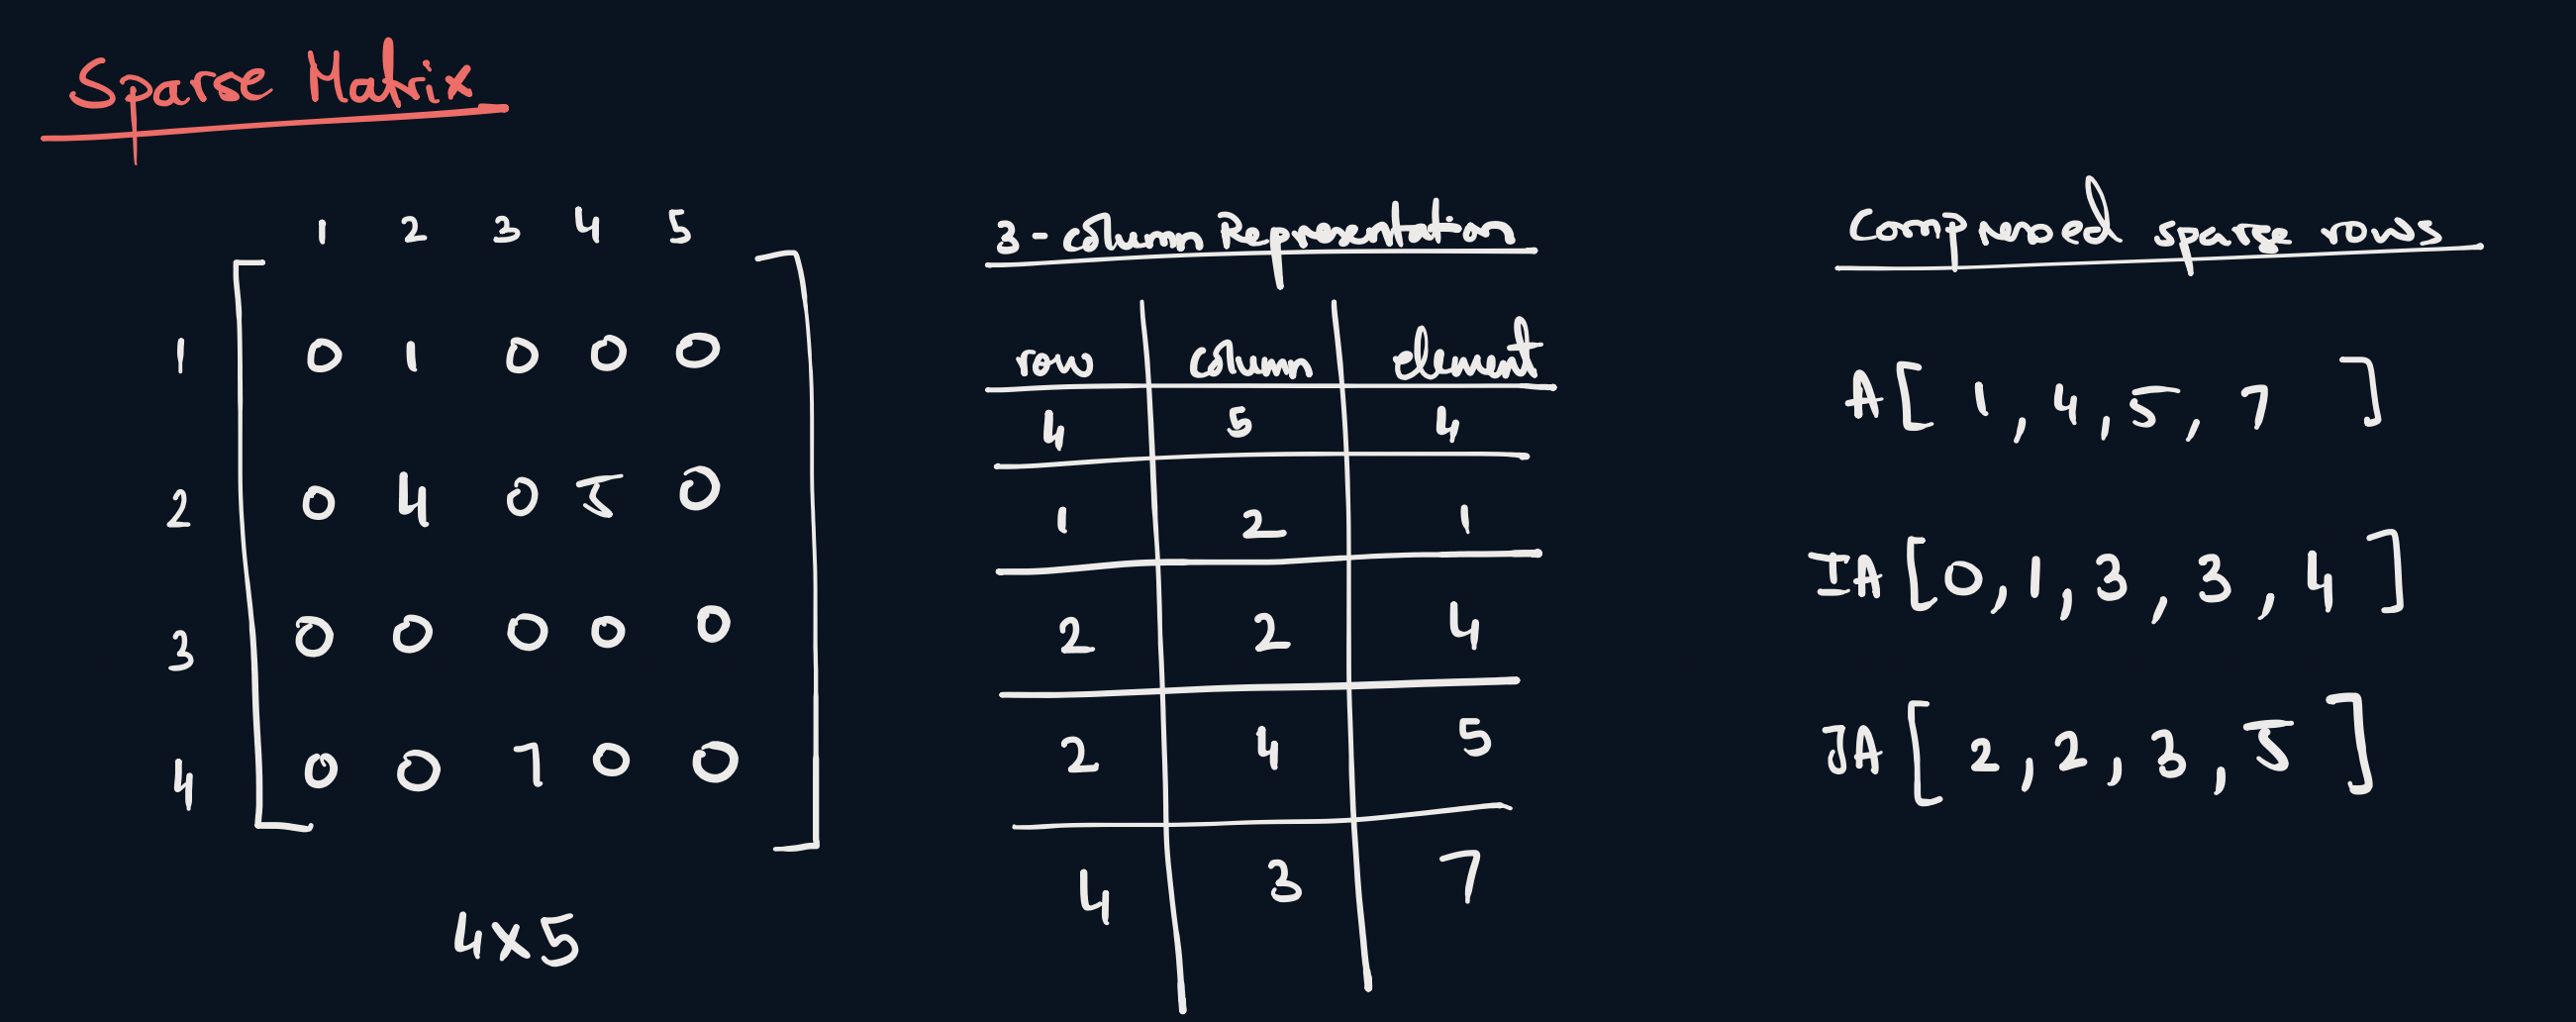

In [2]:
Image(filename='./resources/sm1.png')

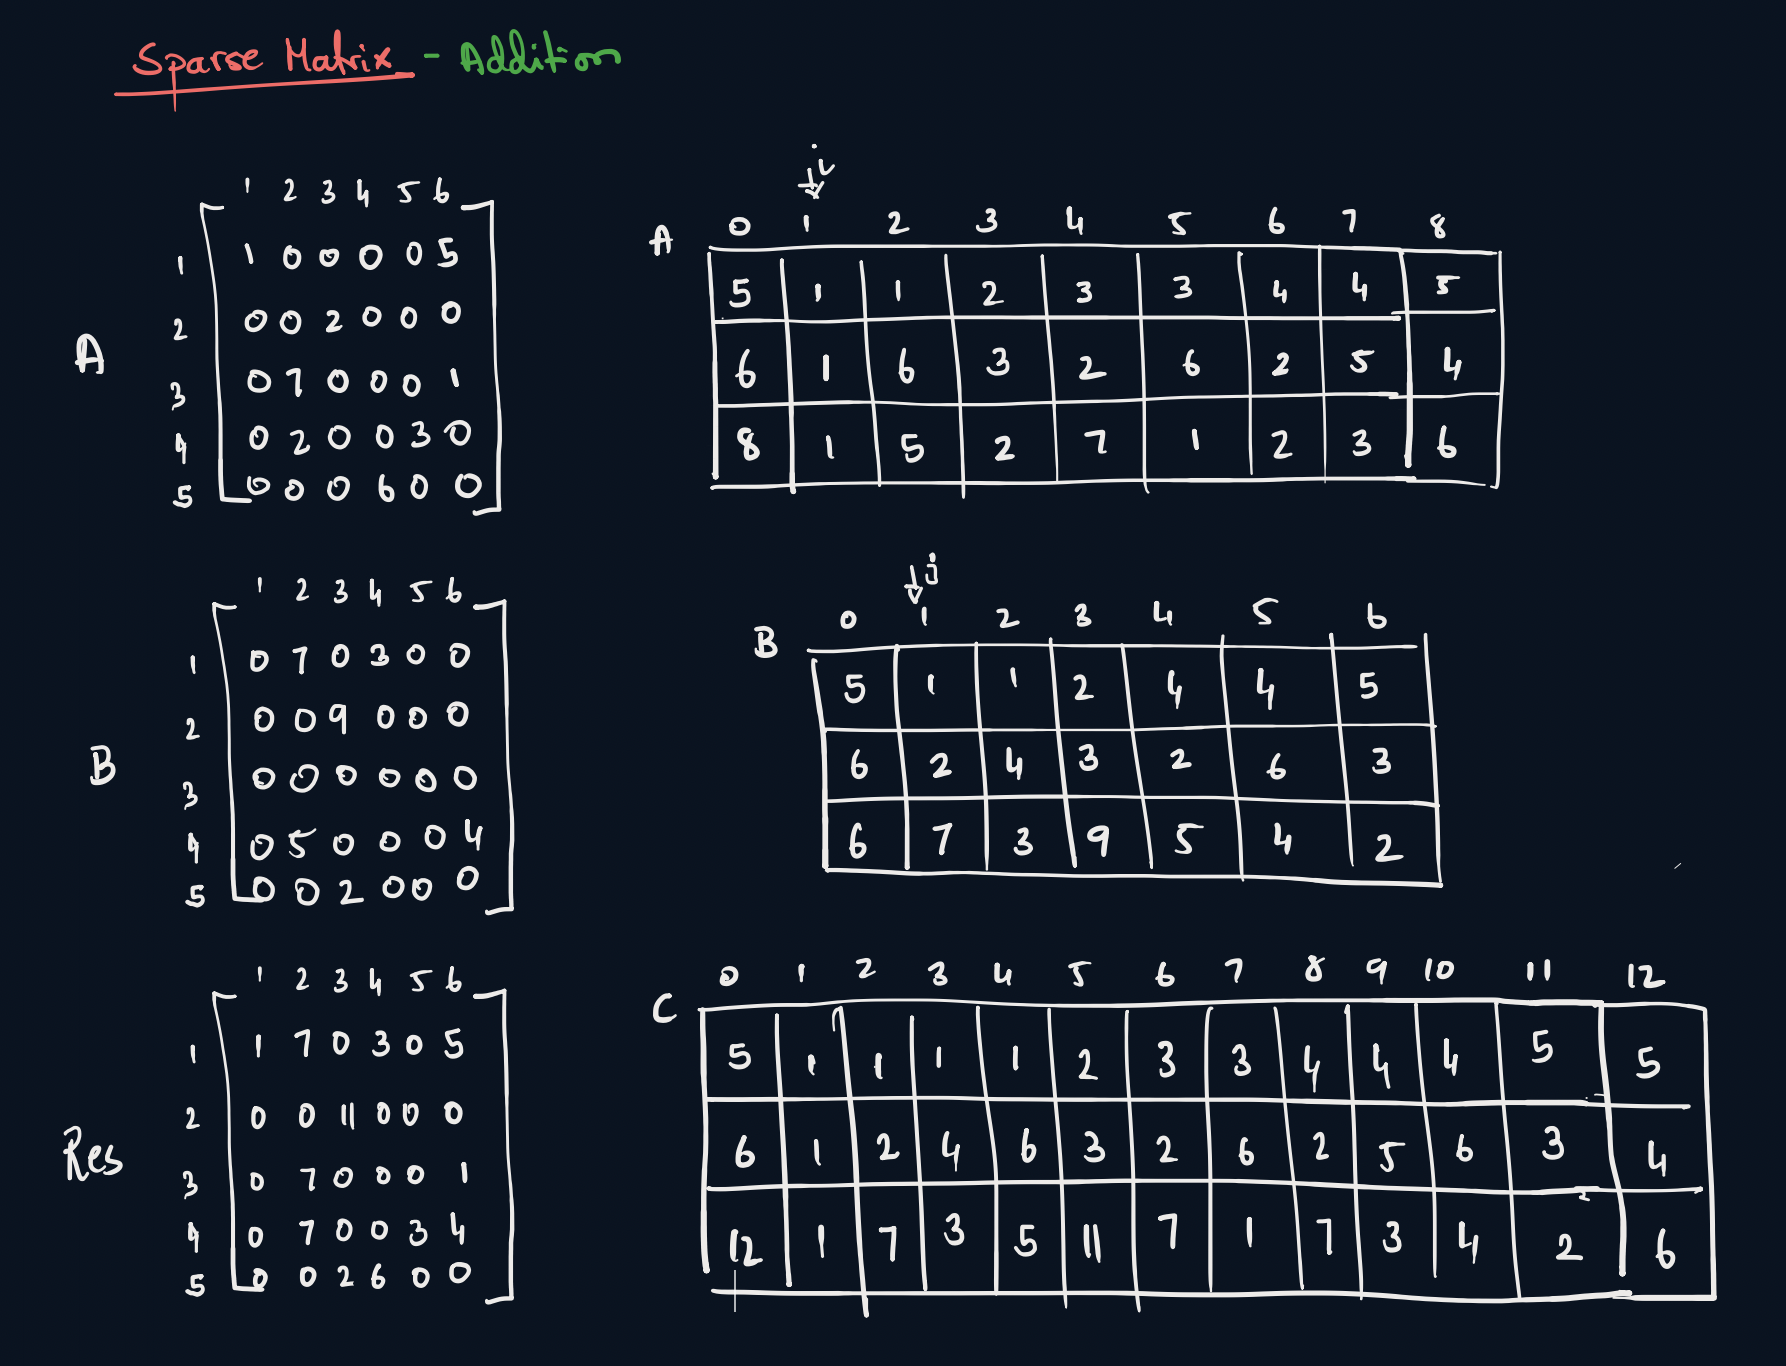

In [3]:
Image(filename='./resources/sm2.png')

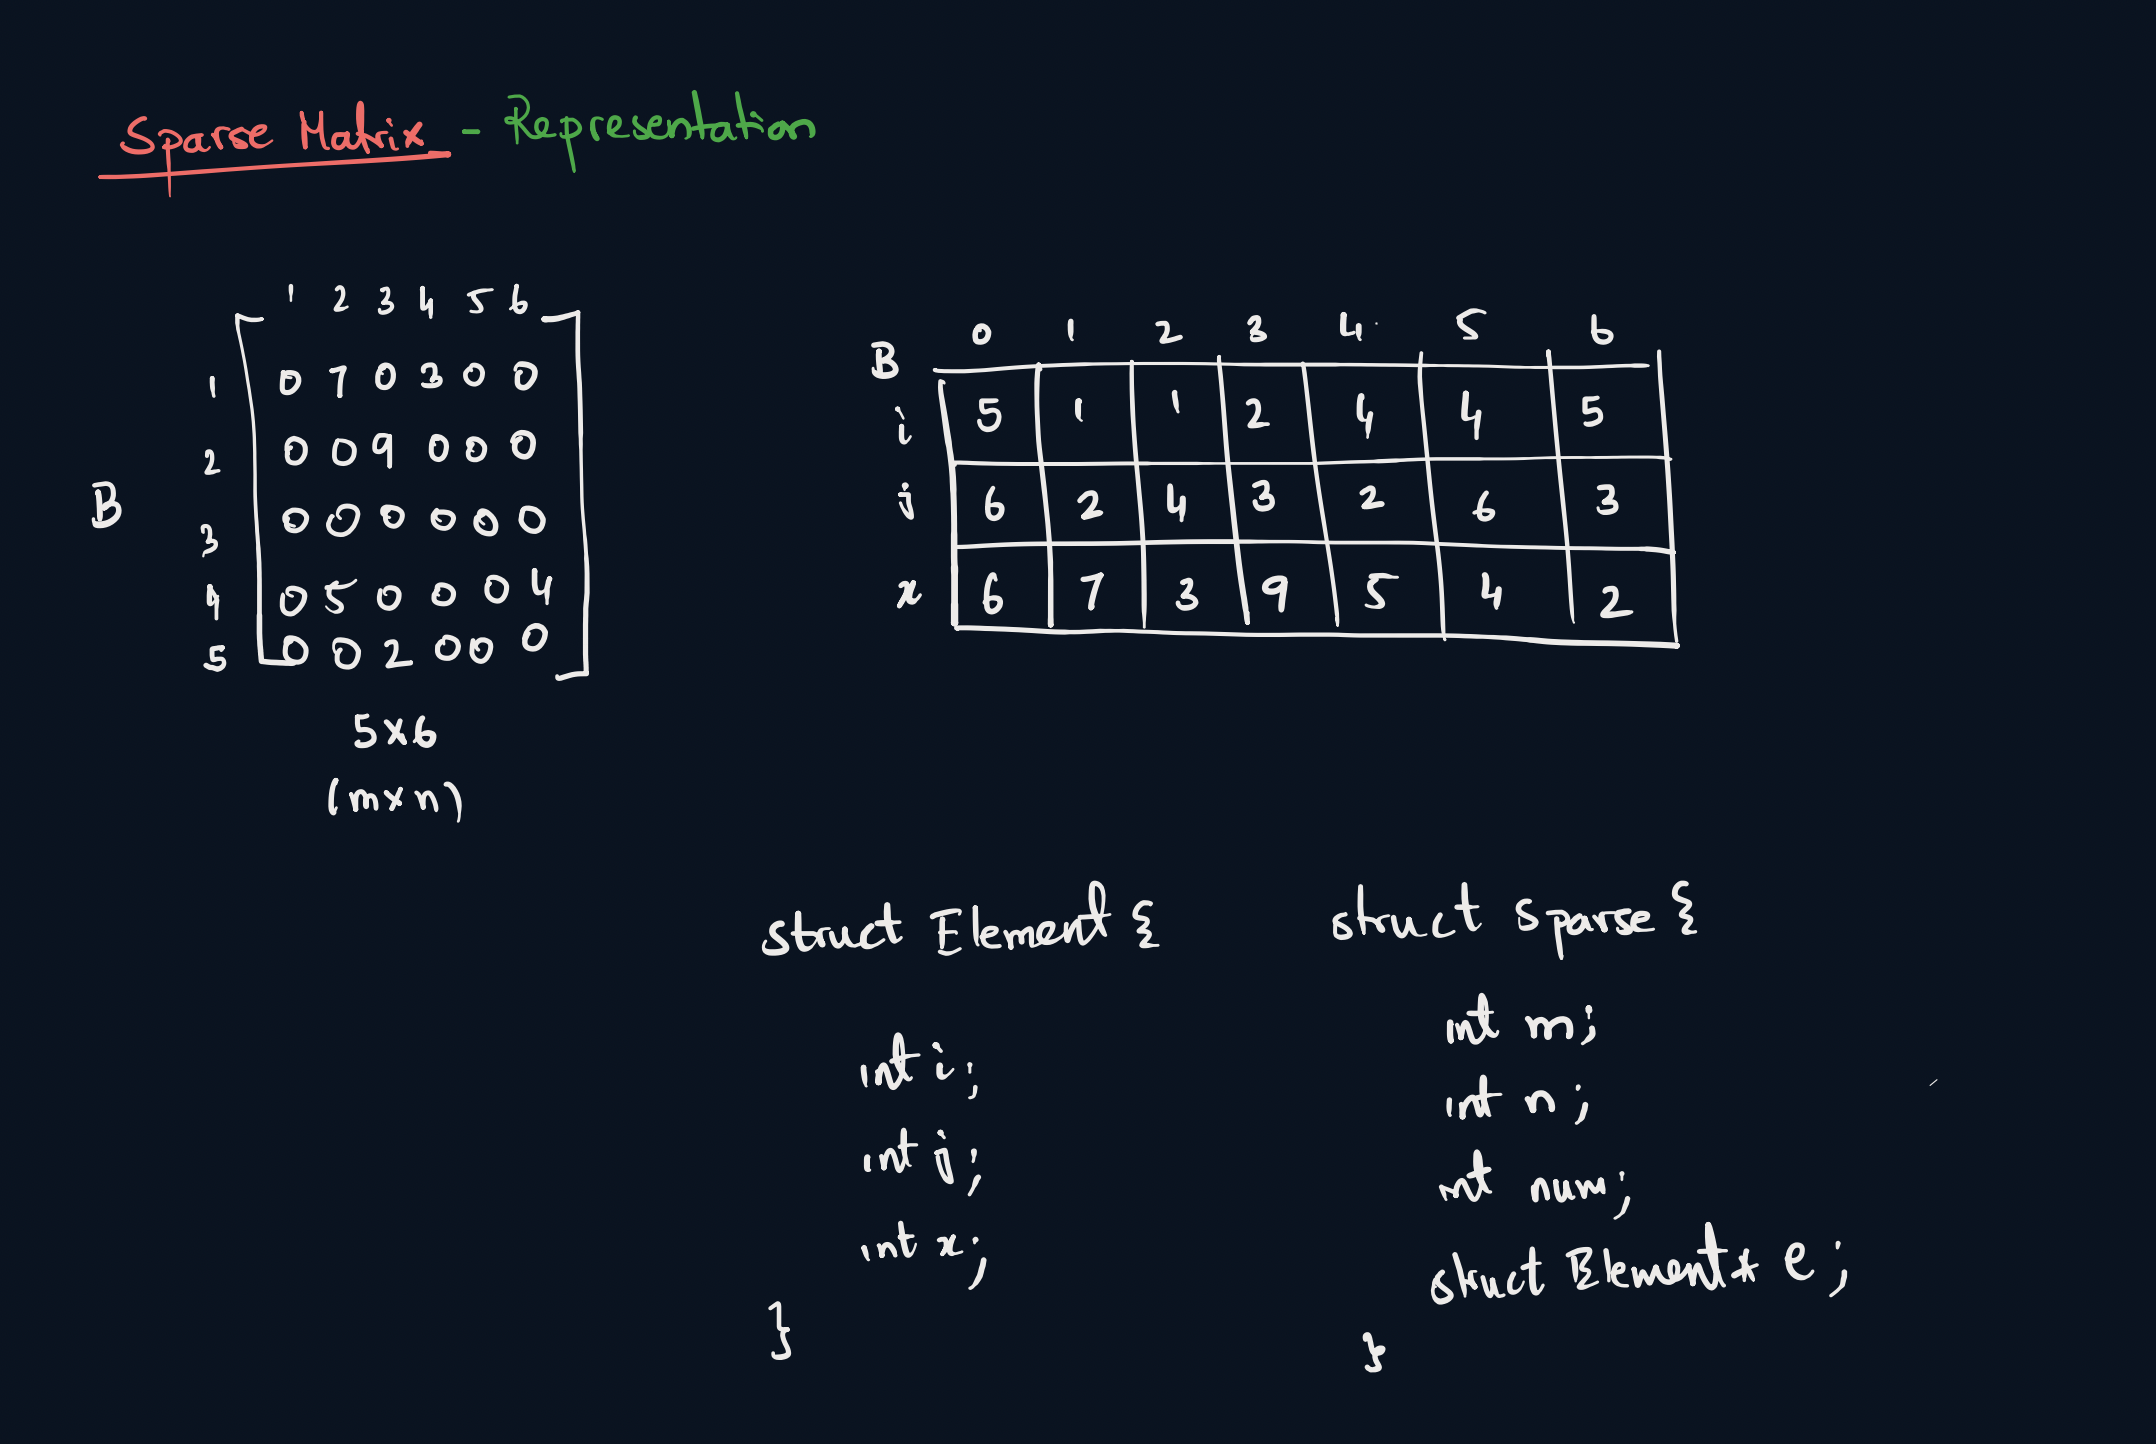

In [4]:
Image(filename='./resources/sm3.png')

## Implementation

```C
#include <stdio.h>
#include <stdlib.h>

struct Element{
  int i; // row
  int j; // column
  int x; // element
};

struct Sparse{
    int m; // rows
    int n; // columns
    int num; // non-zero elements
    struct Element* e;
};

void create(struct Sparse* matrix) {
    printf("Enter the number of rows: ");
    scanf(" %d",&matrix->m);

    printf("Enter the number of columns: ");
    scanf(" %d",&matrix->n);

    printf("Enter the number of non-zero elements: ");
    scanf(" %d",&matrix->num);

    matrix->e = (struct Element*)malloc(matrix->num*sizeof(struct Element));

    printf("Enter the coordinates and the respective element separated by space: row column element\n");
    // provide the coordinates in order (row by row)
    for(int i=0;i<matrix->num;i++){
        scanf(" %d %d %d",&matrix->e[i].i,&matrix->e[i].j,&matrix->e[i].x);
    }

    printf("\n");
}

void display(struct Sparse matrix) {

    int k = 0;
    for(int i=0;i<matrix.m;i++){
        for(int j=0;j<matrix.n;j++){
            if(i==matrix.e[k].i-1 && j==matrix.e[k].j-1) printf("%d ",matrix.e[k++].x);
            else printf("0 ");
        }
        printf("\n");
    }
    printf("\n");
}

struct Sparse* add(struct Sparse* s1, struct Sparse* s2){
    if (s1->m != s2->m || s1->n != s2->n){
        printf("matrix sizes don't correspond\n");
        return NULL;
    }

    struct Sparse* s3 = (struct Sparse*)malloc(sizeof(struct Sparse));
    s3->m = s1->m; s3->n = s1->n; s3->num = 0;
    s3->e = (struct Element*)malloc((s1->num+s2->num)*sizeof(struct Element));

    int i,j,k;

    for(i=0,j=0,k=0; i<s1->num && j<s2->num;){
        if(s1->e[i].i < s2->e[j].i){
            s3->e[k++] = s1->e[i++];
            s3->num++;
        }
        else if(s1->e[i].i > s2->e[j].i){
            s3->e[k++] = s2->e[j++];
            s3->num++;
        }
        else {
            if(s1->e[i].j < s2->e[j].j){
                s3->e[k++] = s1->e[i++];
                s3->num++;
            }
            else if(s1->e[i].j > s2->e[j].j){
                s3->e[k++] = s2->e[j++];
                s3->num++;
            }
            else {
                s3->e[k].i = s1->e[i].i;
                s3->e[k].j = s1->e[i].j;
                s3->e[k].x = s1->e[i].x + s2->e[j].x;
                i++;j++;k++;s3->num++;
            }
        }
    }

    for(;i<s1->num;i++) {
        s3->e[k++] = s1->e[i];
        s3->num++;
    }

    for(;j<s2->num;j++) {
        s3->e[k++] = s2->e[j];
        s3->num++;
    }

    return s3;
    
}


int main() {
    
    struct Sparse matrix1;
    struct Sparse matrix2;

    create(&matrix1);
    create(&matrix2);

    display(matrix1);
    display(matrix2);

    struct Sparse* matrix3 = add(&matrix1,&matrix2);

    if(matrix3){
        display(*matrix3);

        printf("(%d %d %d)\n",matrix3->m,matrix3->n,matrix3->num);
        for(int i=0;i<matrix3->num;i++){
            printf("(%d %d %d)\n",matrix3->e[i].i,matrix3->e[i].j,matrix3->e[i].x);
        }
    }
    
    return 0;
}
```